<a href="https://colab.research.google.com/github/froschi95/Hamoye_data_science/blob/master/Fuel_Data_Analysis_Stage_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Data Analysis - Stage A

The fuel quality data was obtained from the Federal Energy Regulatory Commission and provided by the United States Energy Information Administration. 

The data consists of the following columns:
- 'record_id': record id
- 'utility_id_ferc1': Utility id assigned by the FERC
- 'report_year': year of report
- 'plant_name_ferc1':the name of the plant
- 'fuel_type_code_pudl': the type of fuel
- 'fuel_unit': the unit of fuel
- 'fuel_qty_burned': the quantity of fuel burned
- 'fuel_mmbtu_per_unit': the measure of energy per unit
- 'fuel_cost_per_unit_burned': the fuel cost per unit burned
- 'fuel_cost_per_unit_delivered': the cost of fuel delivered per unit
- 'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

We will be performing exploratory data analysis on the dataset.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the dataset into a pandas Dataframe
data = pd.read_csv('https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true')
# save csv file on my local machine
data.to_csv('fuel_utility_data.csv', index=False)
# returns some information about the dataset, the number of columns, the type of data in each column


In [ ]:
fuel_data = pd.read_csv('fuel_utility_data.csv')
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [ ]:
# returns a brief description/summary on the dataset
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2003_12_182_2_3,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [ ]:
# returns the first 5 rows of the dataset
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


##### Editing column names
We will be correcting the following column names:
`'fuel_type_code_pudl'` to `'fuel_type'`
`'utility_id_ferc1'` to `'utility_id'`
`'plant_name_ferc1'` to `'plant_name'`

In [ ]:
# edit and reassign corrected column names to the dataframe
fuel_data.columns = ['record_id', 'utility_id', 'report_year', 'plant_name',
       'fuel_type', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']

In [ ]:
fuel_data.columns

Index(['record_id', 'utility_id', 'report_year', 'plant_name', 'fuel_type',
       'fuel_unit', 'fuel_qty_burned', 'fuel_mmbtu_per_unit',
       'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered',
       'fuel_cost_per_mmbtu'],
      dtype='object')

In [ ]:
# check for columns with missing values
fuel_data.isnull().sum()

record_id                         0
utility_id                        0
report_year                       0
plant_name                        0
fuel_type                         0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
# check for duplicate rows
fuel_data.duplicated().any()

False

In [ ]:
# return the count of unique values in the 'fuel_unit' column
fuel_data['fuel_unit'].value_counts(dropna=False)

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
NaN         180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

The cell above shows that there are 180 missing values in the `fuel_unit` column.
The cell below gives a clearer picture of the distribution if the missing values in the column

In [ ]:
fuel_data.groupby('fuel_type')['fuel_unit'].value_counts(dropna=False)

fuel_type  fuel_unit
coal       ton           8438
           mmbtu           52
           NaN             51
           mcf              5
           bbl              1
gas        mcf          11333
           mmbtu           94
           NaN             53
           ton              4
           bbl              2
nuclear    gramsU         464
           kgU            110
           mwhth          100
           mwdth           95
           mmbtu           34
           NaN             15
oil        bbl           7952
           gal             81
           NaN             21
           mcf              7
           ton              3
other      ton             77
           bbl             42
           NaN             36
           mcf              9
           gal              3
waste      ton            436
           NaN              4
           bbl              1
Name: fuel_unit, dtype: int64

In [ ]:
# Fill missing values in 'fuel_unit' column with most common value in the column
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna('mcf')
# confirm that all missing values have being filled
fuel_data.isnull().sum()

record_id                       0
utility_id                      0
report_year                     0
plant_name                      0
fuel_type                       0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
# check for the unique years the reports were recorded
fuel_data['report_year'].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [ ]:
# count how many times each unique year appears
fuel_data['report_year'].value_counts()

2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997    1094
2015    1093
1996    1088
1999    1050
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [ ]:
# check unique values in the fuel_type column as well as the count
fuel_data['fuel_type'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type, dtype: int64

In [ ]:
#  group the dataset by fuel type and the year the record was taken
fuel_groupby_type = fuel_data.groupby('fuel_type')
fuel_groupby_year = fuel_data.groupby('report_year')

In [ ]:
# avg_yearly_fuel_usage = fuel_groupby_year.mean().sort_values('fuel_qty_burned', ascending=False)
# max_yearly_fuel_usage = fuel_groupby_year.mean().sort_values('fuel_qty_burned', ascending=False)

The Year with the highest fuel cost per unit delivered is `'1997'`

In [ ]:
fuel_groupby_year.mean().sort_values('fuel_cost_per_unit_delivered', ascending=False)

,utility_id,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1997,108.366545,2.813503e+06,10.247632,149.482132,11140.197239,3.113486
1996,108.714154,2.544754e+06,10.778041,79.434995,9196.705948,2.695880
2000,111.083758,2.472032e+06,9.224475,237.797111,985.362877,4.208403
2009,118.139116,2.154993e+06,7.688192,215.699318,652.694163,10.619376
2018,133.669821,4.178890e+06,6.596546,232.992036,499.269966,7.233643
2015,128.591949,3.340131e+06,7.217820,237.933197,326.535511,8.054361
1998,109.845528,3.267453e+06,10.704964,126.683519,287.154420,2.775862
2014,129.263877,2.700008e+06,7.588334,442.359068,192.737183,10.064673
2013,122.082569,2.741505e+06,7.797024,255.991023,172.307591,9.308225


The fuel type with the lowest average fuel cost per unit burned is `gas` as shown below

In [ ]:
fuel_groupby_type['fuel_cost_per_unit_burned'].mean()

fuel_type
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

#### Kurtosis and Skewness of the dataset

In [ ]:
pd.DataFrame(fuel_data).kurtosis()

utility_id                          1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [ ]:
pd.DataFrame(fuel_data).skew()

utility_id                        0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

#### Percentage Change

In [ ]:
fuel_data.groupby(['fuel_type', 'report_year']).sum().pct_change()

utility_id  fuel_qty_burned  fuel_mmbtu_per_unit  \
fuel_type report_year                                                     
coal      1994                NaN              NaN                  NaN   
          1995           0.015883         0.753184            -0.003051   
          1996          -0.107572        -0.444208            -0.096681   
          1997          -0.032065         0.168921            -0.029103   
          1998           0.048561         0.099531             0.023632   
          1999          -0.027520        -0.019683            -0.017424   
          2000          -0.018947        -0.020988            -0.051709   
          2001          -0.091234        -0.006516            -0.117669   
          2002          -0.040764        -0.049036            -0.080031   
          2003           0.007359        -0.015415            -0.008843   
          2004          -0.016205        -0.035354            -0.033155   
          2005          -0.008445        -0.218351             0.005298   
          2006          -0.010231        -0.007266             0.008545   
          2007          -0.002424         0.021560             0.005408   
          2008           0.027855        -0.061889            -0.033724   
          2009          -0.025567        -0.092540            -0.016873   
          2010          -0.016692         0.136248            -0.006993   
          2011           0.072674        -0.118446             0.017887   
          2012          -0.002629        -0.075605             0.009074   
          2013          -0.017591         0.034736            -0.017632   
          2014           0.034753        -0.085839            -0.084245   
          2015          -0.162544        -0.151692            -0.106610   
          2016          -0.092834        -0.019133            -0.122292   
          2017          -0.048377        -0.133156            -0.066372   
          2018          -0.024728        -0.024732            -0.063723   
gas       1994           0.925490         6.562612            -0.877534   
          1995           0.065033         0.057013             0.030840   
          1996          -0.170426        -0.255034            -0.154185   
          1997           0.052404         0.065114             0.052112   
          1998           0.137355         0.252326             0.152157   
...                           ...              ...                  ...   
other     2012           0.088421         0.002212             4.663155   
          2013          -0.352031         0.459081            -0.085300   
          2014          -0.707463         0.182264            -0.990754   
          2015           0.000000         0.044153            -0.002122   
          2016           0.000000        -0.489746            -0.000709   
waste     1994          34.795918        -0.550498           408.424113   
          1995          -0.046180         0.321846            -0.416097   
          1996          -0.054991        -0.328503             0.082529   
          1997           0.051550         0.386477             0.048948   
          1998          -0.081805         0.062681            -0.422100   
          1999          -0.290206        -0.317383            -0.155807   
          2000           0.003692         0.146197            -0.180697   
          2001           0.028046         0.071468             0.050173   
          2002          -0.008050         0.023546            52.936110   
          2003          -0.163210        -0.223668             0.017672   
          2004           0.262392         0.025685            -0.017160   
          2005          -0.051216         0.446606            -0.001634   
          2006           0.329735         0.138719             0.003674   
          2007          -0.095061         0.177857            -0.000993   
          2008          -0.066168        -0.002820            -0.001488   
          2009           0.343875        -0.0040

In [ ]:
fuel_data.groupby(['fuel_type', 'report_year']).mean().pct_change()

utility_id  fuel_qty_burned  fuel_mmbtu_per_unit  \
fuel_type report_year                                                     
coal      1994                NaN              NaN                  NaN   
          1995           0.015883         0.753184            -0.003051   
          1996          -0.016465        -0.387468            -0.004463   
          1997           0.000432         0.208166             0.003493   
          1998           0.014501         0.063815            -0.009619   
          1999          -0.013791        -0.005843            -0.003553   
          2000           0.034609         0.032456             0.000058   
          2001           0.008906         0.102958            -0.020442   
          2002           0.048804         0.039759             0.005870   
          2003           0.016545        -0.006437             0.000194   
          2004           0.005181        -0.014383            -0.012137   
          2005          -0.014566        -0.223176            -0.000907   
          2006          -0.019312        -0.016373            -0.000708   
          2007          -0.011493         0.012274            -0.003732   
          2008           0.053392        -0.038582            -0.009717   
          2009          -0.016403        -0.084006            -0.007627   
          2010          -0.007357         0.147035             0.002434   
          2011           0.049427        -0.137551            -0.004173   
          2012          -0.014829        -0.086913            -0.003269   
          2013           0.003900         0.057371             0.003857   
          2014           0.122444        -0.008367            -0.006638   
          2015          -0.078174        -0.066228            -0.016604   
          2016           0.017241         0.099885            -0.015792   
          2017           0.019901        -0.070961             0.000615   
          2018           0.030737         0.030733            -0.010475   
gas       1994          -0.165753         2.276614            -0.946940   
          1995           0.031156         0.023391            -0.001951   
          1996          -0.020479        -0.120381            -0.001303   
          1997           0.000723         0.012809             0.000446   
          1998          -0.010612         0.089402             0.002265   
...                           ...              ...                  ...   
other     2012          -0.183684        -0.248341             3.247367   
          2013          -0.136041         0.945441             0.219601   
          2014          -0.122388         2.546793            -0.972263   
          2015           0.000000         0.044153            -0.002122   
          2016           0.000000        -0.489746            -0.000709   
waste     1994           0.491497        -0.981271            16.059338   
          1995           0.040531         0.442014            -0.363015   
          1996          -0.054991        -0.328503             0.082529   
          1997           0.005830         0.326195             0.003341   
          1998           0.055925         0.222083            -0.335415   
          1999           0.013991        -0.024833             0.205990   
          2000           0.003692         0.146197            -0.180697   
          2001          -0.040490         0.000036            -0.019839   
          2002          -0.008050         0.023546            52.936110   
          2003           0.045987        -0.029584             0.272090   
          2004           0.009914        -0.179452            -0.213728   
          2005           0.016554         0.549935             0.069678   
          2006           0.034238        -0.114330            -0.219364   
          2007          -0.041829         0.247142             0.057773   
          2008          -0.007804         0.059504             0.060919   
          2009           0.023905        -0.2411

### Heatmap/ Correlation matrix

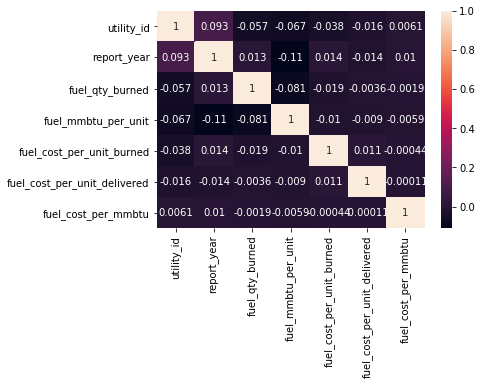

In [ ]:
sns.heatmap(fuel_data.corr(), annot=True)
plt.show()

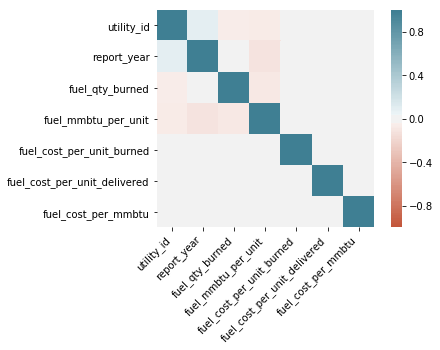

In [ ]:
corr = fuel_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [ ]:
A = [1,2,3,4,5,6]
B = [13,21,34]
A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]
